In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Load the dataset
df = pd.read_csv(r'C:\Users\yuvj1\OneDrive\Desktop\C++\churn csv\Churn_Modelling.csv')

# Explore the dataset
print(df.head())
print(df.info())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
# Handle missing values if any
df = df.dropna()

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df)


In [6]:
# Split the data into features (X) and target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Create a Random Forests classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8555
Confusion Matrix:
[[1576   31]
 [ 258  135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.81      0.34      0.48       393

    accuracy                           0.86      2000
   macro avg       0.84      0.66      0.70      2000
weighted avg       0.85      0.86      0.83      2000



In [9]:
# Confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm_rf,  index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
cm_df


,Predicted 0,Predicted 1
Actual 0,1576,31
Actual 1,258,135


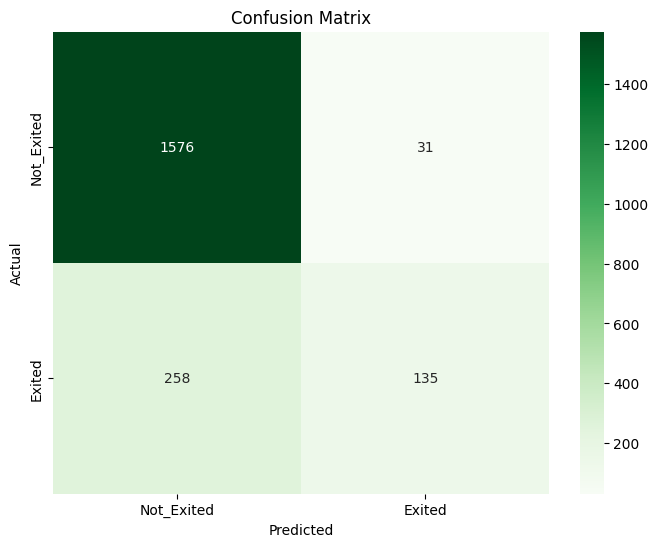

In [10]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Greens', cbar=True, xticklabels=['Not_Exited', 'Exited'], yticklabels=['Not_Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
